In [1]:
import h5py
import numpy as np
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import pandas as pd
from pandas import HDFStore,DataFrame
import time
import os
import mmap

I've previosly created tables for the training and testing datasets of the 28 of March new samples.
They already have the jet color ring and Xbbscore calculated for a mass limit of [110,140]GeV for truth tagging and [50,250]GeV without it. 

# Importing the CVS Tables

In [2]:
# #Reading the file

sample_name = "train_chunk_0_19999999"
df_JCR  = pd.read_hdf('/lstore/calo/martafsilva/Xbb/Jet_color_ring/May19_Analysis/JCR_dataframes_May19/df_JCR_%s.h5'%sample_name, key='table')
df_JCR_tt = pd.read_hdf('/lstore/calo/martafsilva/Xbb/Jet_color_ring/May19_Analysis/JCR_dataframes_May19/df_JCR_tt_%s.h5'%sample_name, key='table')
# df_JCR = pd.read_csv("/lstore/calo/martafsilva/Xbb/Jet_color_ring/May15_Analysis/JCR_dataframes_May15/df_JCR_%s.csv"%sample_name, index_col=None)
# df_JCR_tt = pd.read_csv("/lstore/calo/martafsilva/Xbb/Jet_color_ring/May15_Analysis/JCR_dataframes_May15/df_JCR_tt_%s.csv"%sample_name, index_col=None)


In [3]:
# #i didn't have enough memory to read the training data so i had to do it like this 
# sample_name = "train"
# # Open the file in binary mode for memory mapping
# with open("/lstore/calo/martafsilva/Xbb/Jet_color_ring/May15_Analysis/JCR_dataframes_May15/df_JCR_%s.csv" % sample_name, "r+b") as file:
#     # Create a memory-mapped array of the file
#     mmapped_file = mmap.mmap(file.fileno(), 0, access=mmap.ACCESS_READ)

#     # Find the size of the file
#     file_size = mmapped_file.size()

#     # Read the memory-mapped file using Pandas
#     df_JCR = pd.read_csv(mmapped_file, delimiter=',', index_col=None)


250000.11

In [5]:
# # Open the file in binary mode for memory mapping
# with open("/lstore/calo/martafsilva/Xbb/Jet_color_ring/May15_Analysis/JCR_dataframes_May15/df_JCR_tt_%s.csv" % sample_name, "r+b") as file:
#     # Create a memory-mapped array of the file
#     mmapped_file = mmap.mmap(file.fileno(), 0, access=mmap.ACCESS_READ)

#     # Find the size of the file
#     file_size = mmapped_file.size()

#     # Read the memory-mapped file using Pandas
#     df_JCR_tt = pd.read_csv(mmapped_file, delimiter=',', index_col=None)


In [6]:
df_JCR_tt

,pt,eta,abs_eta,mass,Xbb2020v3_Higgs,Xbb2020v3_QCD,Xbb2020v3_Top,GN2Xv00_phbb,GN2Xv00_phcc,GN2Xv00_ptop,...,eta_3,energy_3,mass_3,HadronConeExclTruthLabelID_3,deta_3,dphi_3,valid_3,jet_color_ring_tt,jet_color_ring_tt_l,XbbScore
0,1.239265e+06,0.097899,0.097899,128276.742188,0.809270,0.075694,0.115035,0.166552,0.821560,0.007810,...,NaN,NaN,NaN,0,0.000000,0.000000,False,NaN,NaN,2.369433
5,5.323214e+05,-1.519152,1.519152,129079.945312,0.988732,0.009109,0.002158,0.840736,0.000851,0.131367,...,NaN,NaN,NaN,0,0.000000,0.000000,False,NaN,NaN,4.687108
11,3.599169e+05,0.522627,0.522627,129929.921875,0.814430,0.052187,0.133382,0.997172,0.000069,0.000081,...,NaN,NaN,NaN,0,0.000000,0.000000,False,NaN,NaN,2.747653
14,9.083674e+05,0.749820,0.749820,114265.421875,0.009257,0.848449,0.142294,0.015632,0.115676,0.050292,...,0.898624,31002.009766,3592.397217,0,0.148804,-0.210062,True,NaN,NaN,-4.518019
15,8.362819e+05,-0.277944,0.277944,139369.406250,0.028838,0.634107,0.337055,0.006980,0.918311,0.059177,...,-0.124716,98321.468750,3531.354492,4,0.153228,0.242023,True,NaN,NaN,-3.090517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999969,7.704731e+05,-1.047363,1.047363,139485.375000,0.005143,0.697047,0.297810,0.016944,0.257836,0.018895,...,-1.122495,21210.615234,1431.014648,0,-0.075132,-0.074839,True,NaN,NaN,-4.909246
19999973,4.948352e+05,0.421462,0.421462,133873.406250,0.003176,0.884372,0.112451,0.047449,0.120755,0.127915,...,0.011776,29591.001953,4613.067383,0,-0.409686,-0.301726,True,NaN,NaN,-5.629182
19999976,1.048080e+06,-1.557478,1.557478,128044.882812,0.099993,0.510326,0.389681,0.008687,0.042122,0.194026,...,-1.637622,36007.882812,2706.711914,0,-0.080144,-0.407135,True,NaN,NaN,-1.629951
19999993,4.935980e+05,1.003529,1.003529,110119.453125,0.002144,0.268454,0.729402,0.005308,0.017314,0.767901,...,0.707766,70383.484375,4479.100098,0,-0.295763,-0.248537,True,NaN,NaN,-4.829909


## Without Truth Tagging

Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

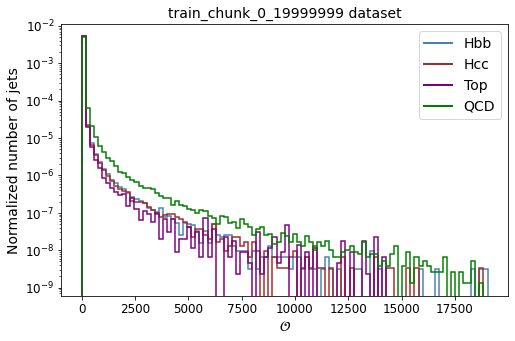

In [9]:
plt.figure(figsize = (8,5))

#rang = np.linspace(0,20,100)
#Plotting the histograms

bins1 = plt.hist(df_JCR[df_JCR["flavour_label"] == 0]["jet_color_ring"], bins=100, histtype='step', density = True,  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR[df_JCR["flavour_label"] == 1]["jet_color_ring"], bins1[1], histtype='step', density = True,  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR[df_JCR["flavour_label"] == 2]["jet_color_ring"], bins1[1], histtype='step', density = True,  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR[df_JCR["flavour_label"] == 3]["jet_color_ring"], bins1[1], histtype='step', density = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r'$\mathcal{O}$', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.xlim(0.1,20)
plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)



Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

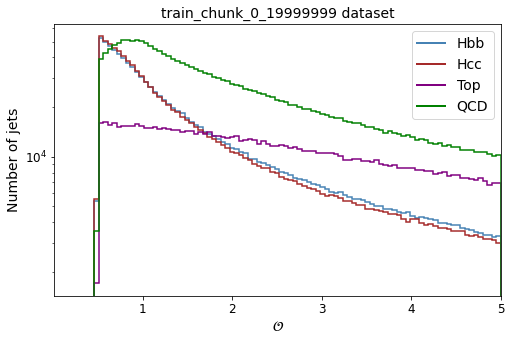

In [11]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(0,5,100)

bins2 = plt.hist(df_JCR[df_JCR["flavour_label"] == 0]["jet_color_ring"], bins = rang, histtype='step',  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR[df_JCR["flavour_label"] == 1]["jet_color_ring"], bins2[1], histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR[df_JCR["flavour_label"] == 2]["jet_color_ring"], bins2[1], histtype='step',  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR[df_JCR["flavour_label"] == 3]["jet_color_ring"], bins2[1], histtype='step', color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r"$\mathcal{O}$", fontsize=14)
plt.ylabel('Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.yscale('log')
plt.xlim(0.01,5)
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)


Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

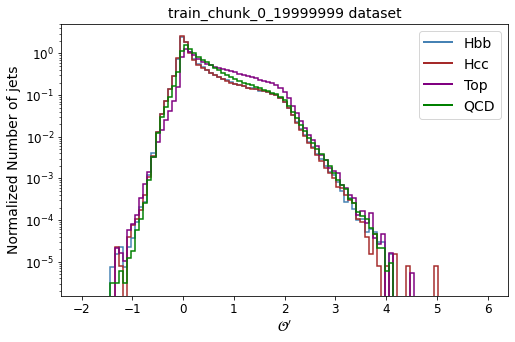

In [12]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(-2,6,100)

bins2 = plt.hist(df_JCR[df_JCR["flavour_label"] == 0]["jet_color_ring_l"], bins = rang, histtype='step',  color = 'steelblue', lw =1.5, density = True)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR[df_JCR["flavour_label"] == 1]["jet_color_ring_l"], bins2[1], histtype='step',  color='brown', lw=1.5, density = True)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR[df_JCR["flavour_label"] == 2]["jet_color_ring_l"], bins2[1], histtype='step',  color='purple', lw=1.5, density = True)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR[df_JCR["flavour_label"] == 3]["jet_color_ring_l"], bins2[1], histtype='step', color='green', lw=1.5, density = True)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r"$\mathcal{O} '$", fontsize=14)
plt.ylabel('Normalized Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)

Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

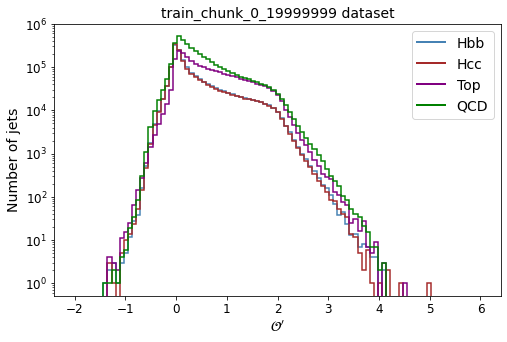

In [13]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(-2,6,100)

bins2 = plt.hist(df_JCR[df_JCR["flavour_label"] == 0]["jet_color_ring_l"], bins = rang, histtype='step',  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR[df_JCR["flavour_label"] == 1]["jet_color_ring_l"], bins2[1], histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR[df_JCR["flavour_label"] == 2]["jet_color_ring_l"], bins2[1], histtype='step',  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR[df_JCR["flavour_label"] == 3]["jet_color_ring_l"], bins2[1], histtype='step', color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r"$\mathcal{O} '$", fontsize=14)
plt.ylabel('Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)

## With Truth Tagging

/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

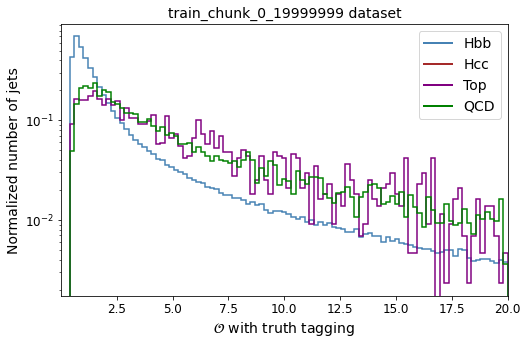

In [17]:
plt.figure(figsize = (8,5))

rang = np.linspace(0,20,100)

#Plotting the histograms

bins1 = plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 0]["jet_color_ring_tt"], bins=rang, histtype='step', density = True,  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 1]["jet_color_ring_tt"], bins1[1], histtype='step', density = True,  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 2]["jet_color_ring_tt"], bins1[1], histtype='step', density = True,  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 3]["jet_color_ring_tt"], bins1[1], histtype='step', density = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r"$\mathcal{O} $" + str(' with truth tagging'), fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.yscale('log')
plt.xlim(0.01,20)
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)



/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

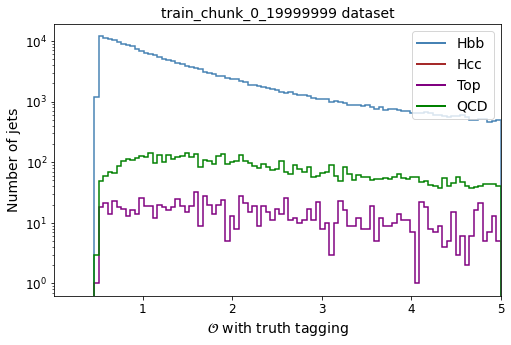

In [15]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(0,5,100)

bins2 = plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 0]["jet_color_ring_tt"], bins = rang, histtype='step',  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 1]["jet_color_ring_tt"], bins2[1], histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 2]["jet_color_ring_tt"], bins2[1], histtype='step',  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 3]["jet_color_ring_tt"], bins2[1], histtype='step', color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r"$\mathcal{O} $" + str(' with truth tagging'), fontsize=14)
plt.ylabel('Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.yscale('log')
plt.xlim(0.01,5)
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)


/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

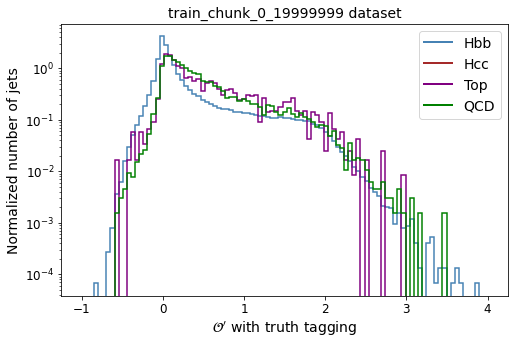

In [16]:
plt.figure(figsize = (8,5))

rang = np.linspace(-1,4,100)

#Plotting the histograms

bins1 = plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 0]["jet_color_ring_tt_l"], bins=rang, histtype='step', density = True,  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 1]["jet_color_ring_tt_l"], bins1[1], histtype='step', density = True,  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 2]["jet_color_ring_tt_l"], bins1[1], histtype='step', density = True,  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 3]["jet_color_ring_tt_l"], bins1[1], histtype='step', density = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r"$\mathcal{O} '$" + str(' with truth tagging'), fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 14)
plt.yscale('log')
plt.title('%s dataset'%sample_name, fontsize = 14)


/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


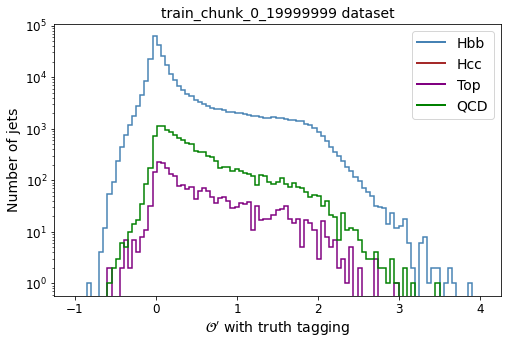

In [17]:
plt.figure(figsize = (8,5))

rang = np.linspace(-1,4,100)

#Plotting the histograms

bins1 = plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 0]["jet_color_ring_tt_l"], bins=rang, histtype='step',   color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 1]["jet_color_ring_tt_l"], bins1[1], histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 2]["jet_color_ring_tt_l"], bins1[1], histtype='step',   color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 3]["jet_color_ring_tt_l"], bins1[1], histtype='step',  color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel(r"$\mathcal{O} '$" + str(' with truth tagging'), fontsize=14)
plt.ylabel('Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)
plt.yscale('log')

## XbbScore without truth tagging

Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

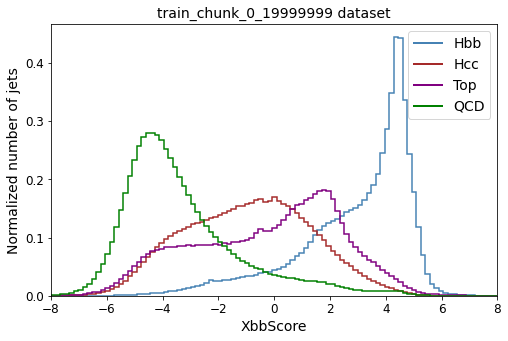

In [18]:
plt.figure(figsize = (8,5))

rang = np.linspace(-8,8,100)
#Plotting the histograms

bins1 = plt.hist(df_JCR[df_JCR["flavour_label"] == 0]["XbbScore"], bins=rang, histtype='step', density = True,  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR[df_JCR["flavour_label"] == 1]["XbbScore"], bins1[1], histtype='step', density = True,  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR[df_JCR["flavour_label"] == 2]["XbbScore"], bins1[1], histtype='step', density = True,  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR[df_JCR["flavour_label"] == 3]["XbbScore"], bins1[1], histtype='step', density = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel('XbbScore', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(-8,8)
#plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)



Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

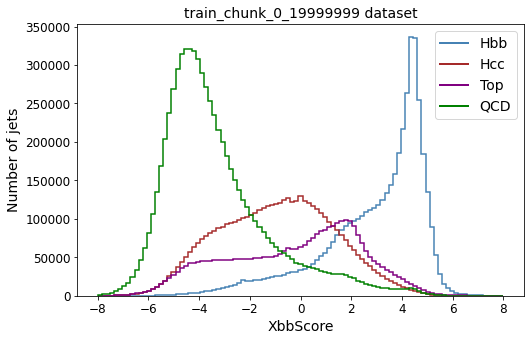

In [19]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(-8,8,100)

bins2 = plt.hist(df_JCR[df_JCR["flavour_label"] == 0]["XbbScore"], bins = rang, histtype='step',  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR[df_JCR["flavour_label"] == 1]["XbbScore"], bins2[1], histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR[df_JCR["flavour_label"] == 2]["XbbScore"], bins2[1], histtype='step',  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR[df_JCR["flavour_label"] == 3]["XbbScore"], bins2[1], histtype='step', color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel('XbbScore', fontsize=14)
plt.ylabel('Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)

## XbbScore with truth tagging

Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

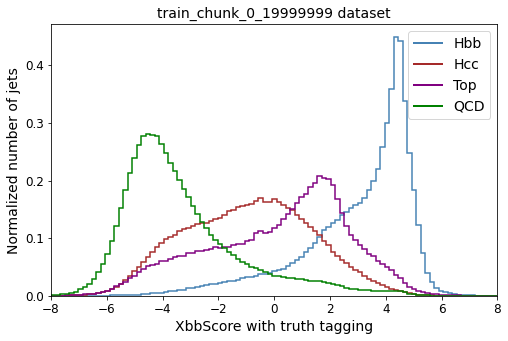

In [20]:
plt.figure(figsize = (8,5))

rang = np.linspace(-8,8,100)
#Plotting the histograms

bins1 = plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 0]["XbbScore"], bins=rang, histtype='step', density = True,  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 1]["XbbScore"], bins1[1], histtype='step', density = True,  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 2]["XbbScore"], bins1[1], histtype='step', density = True,  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 3]["XbbScore"], bins1[1], histtype='step', density = True, color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel('XbbScore with truth tagging', fontsize=14)
plt.ylabel('Normalized number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(-8,8)
#plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)



Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

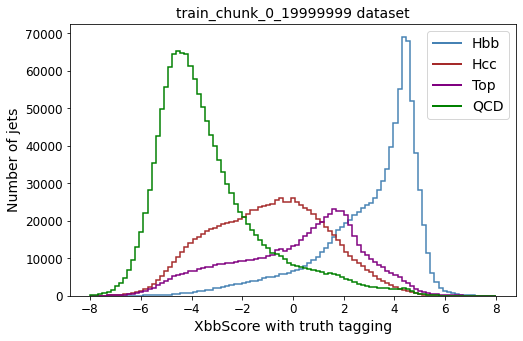

In [21]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(-8,8,100)

bins2 = plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 0]["XbbScore"], bins = rang, histtype='step',  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label='Hbb')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 1]["XbbScore"], bins2[1], histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label='Hcc')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 2]["XbbScore"], bins2[1], histtype='step',  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label='Top')
plt.hist(df_JCR_tt[df_JCR_tt["flavour_label"] == 3]["XbbScore"], bins2[1], histtype='step', color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label='QCD')


# set the axis labels and title
plt.xlabel('XbbScore with truth tagging', fontsize=14)
plt.ylabel('Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)


# Considerando apenas Hbb como sinal e QCD como background

In [13]:
#Reduzir o dataframe #_r of reduced

df_JCR_r = df_JCR[(df_JCR["flavour_label"] == 0) | (df_JCR["flavour_label"] == 3)]
df_JCR_r  = df_JCR_r.reset_index(drop=True)

df_JCR_tt_r = df_JCR_tt[(df_JCR_tt["flavour_label"] == 0) | (df_JCR_tt["flavour_label"] == 3)]
df_JCR_tt_r = df_JCR_tt_r.reset_index(drop=True)

In [14]:
#Create a new column that based on the flavour_label returns 1 for the signal and 0 for background
df_JCR_r['signal'] = df_JCR_r['flavour_label'].replace({0: 1, 3: 0})

df_JCR_tt_r['signal'] = df_JCR_tt_r['flavour_label'].replace({0: 1, 3: 0})

## XbbSCore vs Jet Color Ring

/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


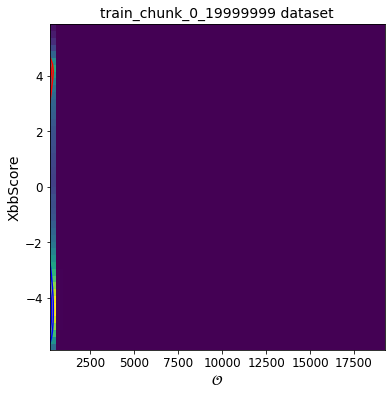

In [86]:
plt.figure(figsize = (6,6))

# define the labels for signal and background
signal_label = 0
background_label = 3

# select the subset of data that corresponds to signal and background
signal_mask = df_JCR_r["flavour_label"] == signal_label
background_mask = df_JCR_r["flavour_label"] == background_label
signal_data = df_JCR_r[signal_mask]
background_data = df_JCR_r[background_mask]

data = pd.concat([signal_data, background_data])

# Define the x and y variables for the plot
x = data["jet_color_ring"]
y = data["XbbScore"]


# Apply signal and background masks to x and y arrays
x_signal = x[signal_mask]
x_background = x[background_mask]
y_signal = y[signal_mask]
y_background = y[background_mask]

# Define the number of bins in the x and y directions
xbins = np.linspace(x.min(), x.max(), 50)
ybins = np.linspace(-6, 6, 50)


# Create histograms for signal and background separately
hist_signal, xedges, yedges = np.histogram2d(x_signal, y_signal, bins=(xbins, ybins))
hist_background, _, _ = np.histogram2d(x_background, y_background, bins=(xbins, ybins))

xedges_new = xbins[:-1] + np.diff(xbins)/2
yedges_new = ybins[:-1] + np.diff(ybins)/2
X, Y = np.meshgrid(xedges_new, yedges_new)


# Create histograms
hist, _, _ = np.histogram2d(x, y, bins=(xbins, ybins))

# Create a 2D color mesh plot for the combined histograms
plt.pcolormesh(X, Y, hist.T, cmap='viridis', vmin=hist.min(), vmax=hist.max())



# Add contour overlays at 50% and 75% of the maximum values for signal and background densities
signal_max = np.max(hist_signal)
background_max = np.max(hist_background)
plt.contour(X, Y, hist_signal.T, levels=[signal_max*0.5, signal_max*0.75], colors=['r','r'] )
plt.contour(X, Y, hist_background.T, levels=[background_max*0.5, background_max*0.75], colors=['b','b'])

# Set the x and y axis labels
plt.xlabel(r"$\mathcal{O}$", fontsize = 14)
plt.ylabel('XbbScore', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('%s dataset'%sample_name, fontsize = 14)


# Show the plot
plt.show()


/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


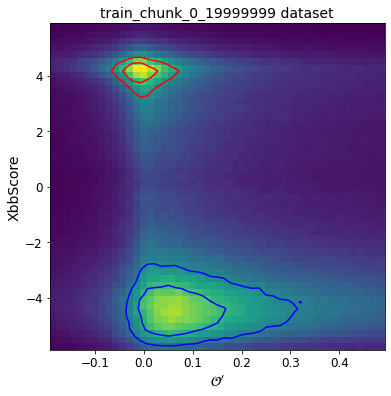

In [22]:
plt.figure(figsize = (6,6))

# define the labels for signal and background
signal_label = 0
background_label = 3

# select the subset of data that corresponds to signal and background
signal_mask = df_JCR_r["flavour_label"] == signal_label
background_mask = df_JCR_r["flavour_label"] == background_label
signal_data = df_JCR_r[signal_mask]
background_data = df_JCR_r[background_mask]

data = pd.concat([signal_data, background_data])

# Define the x and y variables for the plot
x = data["jet_color_ring_l"]
y = data["XbbScore"]


# Apply signal and background masks to x and y arrays
x_signal = x[signal_mask]
x_background = x[background_mask]
y_signal = y[signal_mask]
y_background = y[background_mask]

# Define the number of bins in the x and y directions
xbins = np.linspace(-0.2, 0.5, 50)
ybins = np.linspace(-6, 6, 50)

# Create histograms for signal and background separately
hist_signal, xedges, yedges = np.histogram2d(x_signal, y_signal, bins=(xbins, ybins))
hist_background, _, _ = np.histogram2d(x_background, y_background, bins=(xbins, ybins))

xedges_new = xbins[:-1] + np.diff(xbins)/2
yedges_new = ybins[:-1] + np.diff(ybins)/2
X, Y = np.meshgrid(xedges_new, yedges_new)


# Create histograms
hist, _, _ = np.histogram2d(x, y, bins=(xbins, ybins))

# Create a 2D color mesh plot for the combined histograms
plt.pcolormesh(X, Y, hist.T, cmap='viridis', vmin=hist.min(), vmax=hist.max())



# Add contour overlays at 50% and 75% of the maximum values for signal and background densities
signal_max = np.max(hist_signal)
background_max = np.max(hist_background)
plt.contour(X, Y, hist_signal.T, levels=[signal_max*0.5, signal_max*0.75], colors=['r','r'] )
plt.contour(X, Y, hist_background.T, levels=[background_max*0.5, background_max*0.75], colors=['b','b'])

# Set the x and y axis labels
plt.xlabel(r"$\mathcal{O}   '$", fontsize = 14)
plt.ylabel('XbbScore', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('%s dataset'%sample_name, fontsize = 14)


# Show the plot
plt.show()


/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


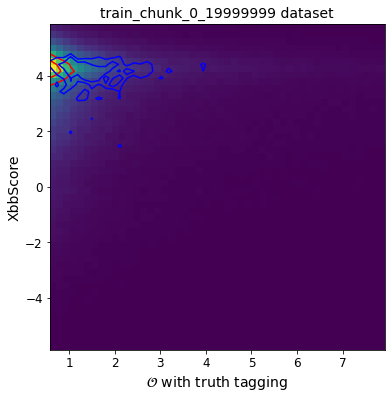

In [19]:
plt.figure(figsize = (6,6))

# define the labels for signal and background
signal_label = 0
background_label = 3

# select the subset of data that corresponds to signal and background
signal_mask = df_JCR_tt_r["flavour_label"] == signal_label
background_mask = df_JCR_tt_r["flavour_label"] == background_label
signal_data = df_JCR_tt_r[signal_mask]
background_data = df_JCR_tt_r[background_mask]

data = pd.concat([signal_data, background_data])

# Define the x and y variables for the plot
x = data["jet_color_ring_tt"]
y = data["XbbScore"]


# Apply signal and background masks to x and y arrays
x_signal = x[signal_mask]
x_background = x[background_mask]
y_signal = y[signal_mask]
y_background = y[background_mask]

# Define the number of bins in the x and y directions
xbins = np.linspace(0.5, 8, 50)
ybins = np.linspace(-6, 6, 50)

# Create histograms for signal and background separately
hist_signal, xedges, yedges = np.histogram2d(x_signal, y_signal, bins=(xbins, ybins))
hist_background, _, _ = np.histogram2d(x_background, y_background, bins=(xbins, ybins))

xedges_new = xbins[:-1] + np.diff(xbins)/2
yedges_new = ybins[:-1] + np.diff(ybins)/2
X, Y = np.meshgrid(xedges_new, yedges_new)


# Create histograms
hist, _, _ = np.histogram2d(x, y, bins=(xbins, ybins))

# Create a 2D color mesh plot for the combined histograms
plt.pcolormesh(X, Y, hist.T, cmap='viridis', vmin=hist.min(), vmax=hist.max())



# Add contour overlays at 50% and 75% of the maximum values for signal and background densities
signal_max = np.max(hist_signal)
background_max = np.max(hist_background)
plt.contour(X, Y, hist_signal.T, levels=[signal_max*0.5, signal_max*0.75], colors=['r','r'] )
plt.contour(X, Y, hist_background.T, levels=[background_max*0.5, background_max*0.75], colors=['b','b'])

# Set the x and y axis labels
plt.xlabel(r"$\mathcal{O}$ with truth tagging", fontsize = 14)
plt.ylabel('XbbScore', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('%s dataset'%sample_name, fontsize = 14)


# Show the plot
plt.show()

/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


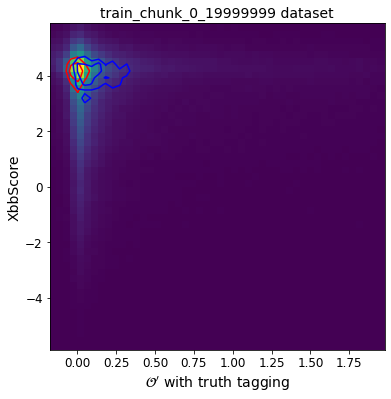

In [28]:
plt.figure(figsize = (6,6))

# define the labels for signal and background
signal_label = 0
background_label = 3

filtered_df = df_JCR_tt_r[(df_JCR_tt_r['jet_color_ring_tt_l'] >= -0.2) & (df_JCR_tt_r['jet_color_ring_tt_l'] <= 2) & 
                          (df_JCR_tt_r['XbbScore'] >= y_min) & (df_JCR_tt_r['XbbScore'] <= y_max)]

# select the subset of data that corresponds to signal and background
signal_mask = filtered_df["flavour_label"] == signal_label 
background_mask = filtered_df["flavour_label"] == background_label
signal_data = filtered_df[signal_mask]
background_data = filtered_df[background_mask]

data = pd.concat([signal_data, background_data])

# Define the x and y variables for the plot
x = data["jet_color_ring_tt_l"]
y = data["XbbScore"]


# Apply signal and background masks to x and y arrays
x_signal = x[signal_mask]
x_background = x[background_mask]
y_signal = y[signal_mask]
y_background = y[background_mask]

# Define the number of bins in the x and y directions
xbins = np.linspace(-0.2,2, 50)
ybins = np.linspace(-6, 6, 50)

# Create histograms for signal and background separately
hist_signal, xedges, yedges = np.histogram2d(x_signal, y_signal, bins=(xbins, ybins))
hist_background, _, _ = np.histogram2d(x_background, y_background, bins=(xbins, ybins))

xedges_new = xbins[:-1] + np.diff(xbins)/2
yedges_new = ybins[:-1] + np.diff(ybins)/2
X, Y = np.meshgrid(xedges_new, yedges_new)


# Create histograms
hist, _, _ = np.histogram2d(x, y, bins=(xbins, ybins))

# Create a 2D color mesh plot for the combined histograms
plt.pcolormesh(X, Y, hist.T, cmap='viridis', vmin=hist.min(), vmax=hist.max())



# Add contour overlays at 50% and 75% of the maximum values for signal and background densities
signal_max = np.max(hist_signal)
background_max = np.max(hist_background)
plt.contour(X, Y, hist_signal.T, levels=[signal_max*0.5, signal_max*0.75], colors=['r','r'] )
plt.contour(X, Y, hist_background.T, levels=[background_max*0.5, background_max*0.75], colors=['b','b'])

# Set the x and y axis labels
plt.xlabel(r"$\mathcal{O}   '$ with truth tagging", fontsize = 14)
plt.ylabel('XbbScore', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('%s dataset'%sample_name, fontsize = 14)


# Show the plot
plt.show()


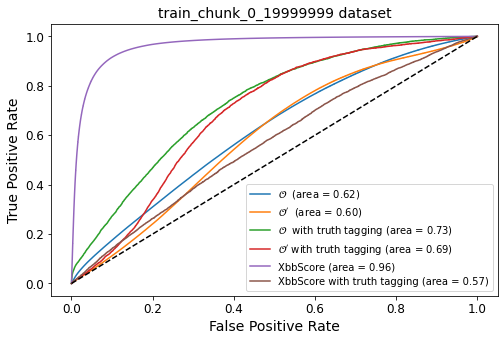

In [24]:
from sklearn.metrics import roc_curve, auc
df_JCR_r.dropna(inplace=True)
df_JCR_tt_r.dropna(inplace=True)
plt.figure(figsize = (8,5))

# compute the ROC curve for jcr_cut
fpr_jcr, tpr_jcr, thresholds_jcr = roc_curve(df_JCR_r['signal'], df_JCR_r['jet_color_ring'],pos_label=0)
roc_auc_jcr = auc(fpr_jcr, tpr_jcr)

# compute the ROC curve for jcrl_cut
fpr_jcrl, tpr_jcrl, thresholds_jcrl = roc_curve(df_JCR_r['signal'], df_JCR_r['jet_color_ring_l'],pos_label=0)
roc_auc_jcrl = auc(fpr_jcrl, tpr_jcrl)

# compute the ROC curve for jcrl_cut
fpr_jcrtt, tpr_jcrtt, thresholds_jcrtt = roc_curve(df_JCR_tt_r['signal'], df_JCR_tt_r['jet_color_ring_tt'],pos_label=0)
roc_auc_jcrtt = auc(fpr_jcrtt, tpr_jcrtt)


# compute the ROC curve for jcrl_cut
fpr_jcrttl, tpr_jcrttl, thresholds_jcrttl = roc_curve(df_JCR_tt_r['signal'], df_JCR_tt_r['jet_color_ring_tt_l'],pos_label=0)
roc_auc_jcrttl = auc(fpr_jcrttl, tpr_jcrttl)

# compute the ROC curve for xbbscore_cut
fpr_xbbscore, tpr_xbbscore, thresholds_xbbscore = roc_curve(df_JCR_r['signal'], df_JCR_r['XbbScore'])
roc_auc_xbbscore = auc(fpr_xbbscore, tpr_xbbscore)

# compute the ROC curve for xbbscore_cut
fpr_xbbscorett, tpr_xbbscorett, thresholds_xbbscorett = roc_curve(df_JCR_tt_r['signal'], df_JCR_tt_r['XbbScore'])
roc_auc_xbbscorett = auc(fpr_xbbscorett, tpr_xbbscorett)

# plot ROC curve for jcr_cut
plt.plot(fpr_jcr, tpr_jcr, label=r"$\mathcal{O}$  (area = %0.2f)" % roc_auc_jcr)
plt.plot(fpr_jcrl, tpr_jcrl, label=r"$\mathcal{O}   '$  (area = %0.2f)" % roc_auc_jcrl)
plt.plot(fpr_jcrtt, tpr_jcrtt, label=r"$\mathcal{O}$  with truth tagging (area = %0.2f)" % roc_auc_jcrtt)
plt.plot(fpr_jcrttl, tpr_jcrttl, label=r"$\mathcal{O}   '$ with truth tagging (area = %0.2f) " % roc_auc_jcrttl)
plt.plot(fpr_xbbscore, tpr_xbbscore, label='XbbScore (area = %0.2f)' % roc_auc_xbbscore)
plt.plot(fpr_xbbscorett, tpr_xbbscorett, label='XbbScore with truth tagging (area = %0.2f)' % roc_auc_xbbscorett)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing line
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.legend(loc="lower right")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('%s dataset'%sample_name, fontsize = 14)

plt.show()

In [29]:
df_JCR_r


,pt,eta,abs_eta,mass,Xbb2020v3_Higgs,Xbb2020v3_QCD,Xbb2020v3_Top,GN2Xv00_phbb,GN2Xv00_phcc,GN2Xv00_ptop,...,energy_3,mass_3,HadronConeExclTruthLabelID_3,deta_3,dphi_3,valid_3,jet_color_ring,jet_color_ring_l,XbbScore,signal
2,821312.0000,-0.129709,0.129709,164317.671875,0.926393,0.020268,0.053339,0.992806,0.000149,0.000222,...,15082.094727,2366.960205,0,0.001523,0.040129,True,0.627989,-0.064669,3.822256,1
6,893562.2500,-0.042305,0.042305,142093.796875,0.714813,0.019629,0.265558,0.988030,0.005308,0.004370,...,15194.240234,2772.464600,0,0.055815,-0.084018,True,0.823478,-0.018110,3.595005,1
7,908367.4375,0.749820,0.749820,114265.421875,0.009257,0.848449,0.142294,0.015632,0.115676,0.050292,...,31002.009766,3592.397217,0,0.148804,-0.210062,True,5.447016,0.169973,-4.518019,0
8,896224.4375,0.738276,0.738276,128020.257812,0.038644,0.773181,0.188175,0.022829,0.023364,0.048873,...,15899.918945,2845.396240,0,-0.143427,0.092137,True,2.076871,0.127683,-2.996126,0
9,800021.0000,1.476781,1.476781,228424.109375,0.012393,0.640250,0.347357,0.012598,0.043843,0.091714,...,92938.875000,5345.140625,0,-0.187781,0.492201,True,9.949168,0.722911,-3.944740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11793816,500244.9375,1.246405,1.246405,140398.015625,0.085824,0.092496,0.821680,0.021201,0.418416,0.030247,...,31960.853516,3640.452881,0,0.000919,0.120596,True,0.920182,-0.027194,-0.074863,0
11793819,791671.4375,-0.035663,0.035663,59982.808594,0.002337,0.891213,0.106450,0.009305,0.025393,0.057390,...,10401.223633,1205.419800,0,-0.474883,0.386809,True,55.525689,0.825505,-5.943683,0
11793821,888184.2500,0.219645,0.219645,82376.625000,0.057918,0.182177,0.759905,0.014877,0.692622,0.037803,...,17971.167969,2469.225342,0,0.023691,0.607271,True,41.082764,0.693150,-1.145947,0
11793822,724511.7500,-0.501755,0.501755,83302.093750,0.002751,0.890264,0.106985,0.012085,0.049942,0.055215,...,63320.160156,5699.819336,0,-0.039081,-0.169493,True,3.102660,0.093140,-5.779515,0


### Fazer um corte para XbbScore > 2

In [12]:

df_JCR_r_c = df_JCR_r[df_JCR_r['XbbScore'] > 2]
df_JCR_tt_r_c = df_JCR_tt_r[df_JCR_tt_r['XbbScore'] > 2]

NameError: name 'df_JCR_r' is not defined

/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


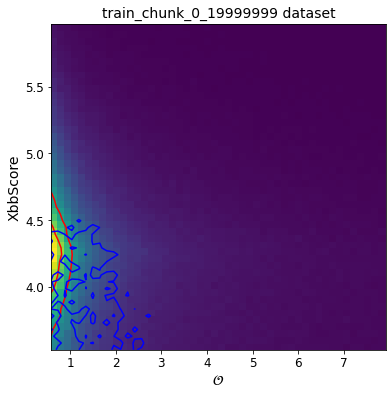

In [40]:
plt.figure(figsize = (6,6))

# define the labels for signal and background
signal_label = 0
background_label = 3

# select the subset of data that corresponds to signal and background
signal_mask = df_JCR_r_c["flavour_label"] == signal_label
background_mask = df_JCR_r_c["flavour_label"] == background_label
signal_data = df_JCR_r_c[signal_mask]
background_data = df_JCR_r_c[background_mask]

data = pd.concat([signal_data, background_data])

# Define the x and y variables for the plot
x = data["jet_color_ring"]
y = data["XbbScore"]


# Apply signal and background masks to x and y arrays
x_signal = x[signal_mask]
x_background = x[background_mask]
y_signal = y[signal_mask]
y_background = y[background_mask]

# Define the number of bins in the x and y directions
xbins = np.linspace(0.5, 8, 50)
ybins = np.linspace(3.5, 6, 50)


# Create histograms for signal and background separately
hist_signal, xedges, yedges = np.histogram2d(x_signal, y_signal, bins=(xbins, ybins))
hist_background, _, _ = np.histogram2d(x_background, y_background, bins=(xbins, ybins))

xedges_new = xbins[:-1] + np.diff(xbins)/2
yedges_new = ybins[:-1] + np.diff(ybins)/2
X, Y = np.meshgrid(xedges_new, yedges_new)


# Create histograms
hist, _, _ = np.histogram2d(x, y, bins=(xbins, ybins))

# Create a 2D color mesh plot for the combined histograms
plt.pcolormesh(X, Y, hist.T, cmap='viridis', vmin=hist.min(), vmax=hist.max())



# Add contour overlays at 50% and 75% of the maximum values for signal and background densities
signal_max = np.max(hist_signal)
background_max = np.max(hist_background)
plt.contour(X, Y, hist_signal.T, levels=[signal_max*0.5, signal_max*0.75], colors=['r','r'] )
plt.contour(X, Y, hist_background.T, levels=[background_max*0.5, background_max*0.75], colors=['b','b'])

# Set the x and y axis labels
plt.xlabel(r"$\mathcal{O}$", fontsize = 14)
plt.ylabel('XbbScore', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('%s dataset'%sample_name, fontsize = 14)


# Show the plot
plt.show()

/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


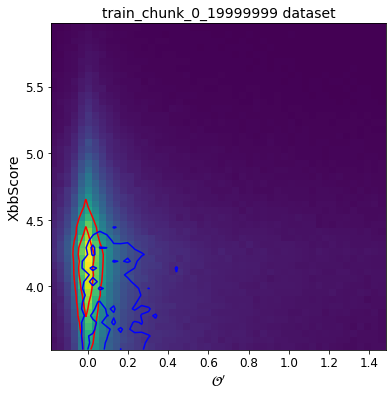

In [39]:
plt.figure(figsize = (6,6))

# define the labels for signal and background
signal_label = 0
background_label = 3

# select the subset of data that corresponds to signal and background
signal_mask = df_JCR_r_c["flavour_label"] == signal_label
background_mask = df_JCR_r_c["flavour_label"] == background_label
signal_data = df_JCR_r_c[signal_mask]
background_data = df_JCR_r_c[background_mask]

data = pd.concat([signal_data, background_data])

# Define the x and y variables for the plot
x = data["jet_color_ring_l"]
y = data["XbbScore"]


# Apply signal and background masks to x and y arrays
x_signal = x[signal_mask]
x_background = x[background_mask]
y_signal = y[signal_mask]
y_background = y[background_mask]

# Define the number of bins in the x and y directions
xbins = np.linspace(-0.2, 1.5, 50)
ybins = np.linspace(3.5, 6, 50)

# Create histograms for signal and background separately
hist_signal, xedges, yedges = np.histogram2d(x_signal, y_signal, bins=(xbins, ybins))
hist_background, _, _ = np.histogram2d(x_background, y_background, bins=(xbins, ybins))

xedges_new = xbins[:-1] + np.diff(xbins)/2
yedges_new = ybins[:-1] + np.diff(ybins)/2
X, Y = np.meshgrid(xedges_new, yedges_new)


# Create histograms
hist, _, _ = np.histogram2d(x, y, bins=(xbins, ybins))

# Create a 2D color mesh plot for the combined histograms
plt.pcolormesh(X, Y, hist.T, cmap='viridis', vmin=hist.min(), vmax=hist.max())



# Add contour overlays at 50% and 75% of the maximum values for signal and background densities
signal_max = np.max(hist_signal)
background_max = np.max(hist_background)
plt.contour(X, Y, hist_signal.T, levels=[signal_max*0.5, signal_max*0.75], colors=['r','r'] )
plt.contour(X, Y, hist_background.T, levels=[background_max*0.5, background_max*0.75], colors=['b','b'])

# Set the x and y axis labels
plt.xlabel(r"$\mathcal{O}   '$", fontsize = 14)
plt.ylabel('XbbScore', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('%s dataset'%sample_name, fontsize = 14)


# Show the plot
plt.show()


/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


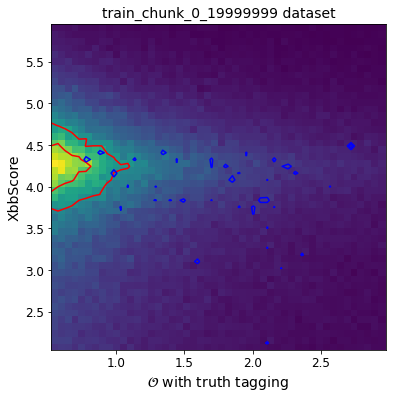

In [38]:
plt.figure(figsize = (6,6))

# define the labels for signal and background
signal_label = 0
background_label = 3

# select the subset of data that corresponds to signal and background
signal_mask = df_JCR_tt_r_c["flavour_label"] == signal_label
background_mask = df_JCR_tt_r_c["flavour_label"] == background_label
signal_data = df_JCR_tt_r_c[signal_mask]
background_data = df_JCR_tt_r_c[background_mask]

data = pd.concat([signal_data, background_data])

# Define the x and y variables for the plot
x = data["jet_color_ring_tt"]
y = data["XbbScore"]


# Apply signal and background masks to x and y arrays
x_signal = x[signal_mask]
x_background = x[background_mask]
y_signal = y[signal_mask]
y_background = y[background_mask]

# Define the number of bins in the x and y directions
xbins = np.linspace(0.5, 3, 50)
ybins = np.linspace(2, 6, 50)

# Create histograms for signal and background separately
hist_signal, xedges, yedges = np.histogram2d(x_signal, y_signal, bins=(xbins, ybins))
hist_background, _, _ = np.histogram2d(x_background, y_background, bins=(xbins, ybins))

xedges_new = xbins[:-1] + np.diff(xbins)/2
yedges_new = ybins[:-1] + np.diff(ybins)/2
X, Y = np.meshgrid(xedges_new, yedges_new)


# Create histograms
hist, _, _ = np.histogram2d(x, y, bins=(xbins, ybins))

# Create a 2D color mesh plot for the combined histograms
plt.pcolormesh(X, Y, hist.T, cmap='viridis', vmin=hist.min(), vmax=hist.max())



# Add contour overlays at 50% and 75% of the maximum values for signal and background densities
signal_max = np.max(hist_signal)
background_max = np.max(hist_background)
plt.contour(X, Y, hist_signal.T, levels=[signal_max*0.5, signal_max*0.75], colors=['r','r'] )
plt.contour(X, Y, hist_background.T, levels=[background_max*0.5, background_max*0.75], colors=['b','b'])

# Set the x and y axis labels
plt.xlabel(r"$\mathcal{O}$ with truth tagging", fontsize = 14)
plt.ylabel('XbbScore', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('%s dataset'%sample_name, fontsize = 14)


# Show the plot
plt.show()


/lstore/calo/martafsilva/envs/venv_xbb/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


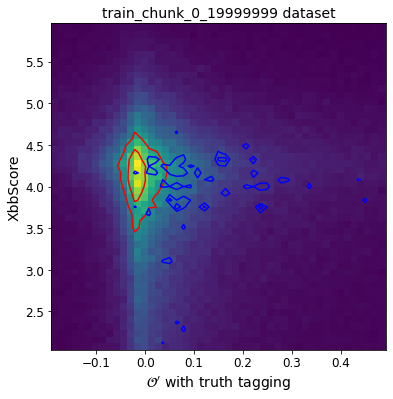

In [17]:
plt.figure(figsize = (6,6))

# define the labels for signal and background
signal_label = 0
background_label = 3

# select the subset of data that corresponds to signal and background
signal_mask = df_JCR_tt_r_c["flavour_label"] == signal_label
background_mask = df_JCR_tt_r_c["flavour_label"] == background_label
signal_data = df_JCR_tt_r_c[signal_mask]
background_data = df_JCR_tt_r_c[background_mask]

data = pd.concat([signal_data, background_data])

# Define the x and y variables for the plot
x = data["jet_color_ring_tt_l"]
y = data["XbbScore"]


# Apply signal and background masks to x and y arrays
x_signal = x[signal_mask]
x_background = x[background_mask]
y_signal = y[signal_mask]
y_background = y[background_mask]

# Define the number of bins in the x and y directions
xbins = np.linspace(-0.2, 0.5, 50)
ybins = np.linspace(2, 6, 50)

# Create histograms for signal and background separately
hist_signal, xedges, yedges = np.histogram2d(x_signal, y_signal, bins=(xbins, ybins))
hist_background, _, _ = np.histogram2d(x_background, y_background, bins=(xbins, ybins))

xedges_new = xbins[:-1] + np.diff(xbins)/2
yedges_new = ybins[:-1] + np.diff(ybins)/2
X, Y = np.meshgrid(xedges_new, yedges_new)


# Create histograms
hist, _, _ = np.histogram2d(x, y, bins=(xbins, ybins))

# Create a 2D color mesh plot for the combined histograms
plt.pcolormesh(X, Y, hist.T, cmap='viridis', vmin=hist.min(), vmax=hist.max())



# Add contour overlays at 50% and 75% of the maximum values for signal and background densities
signal_max = np.max(hist_signal)
background_max = np.max(hist_background)
plt.contour(X, Y, hist_signal.T, levels=[signal_max*0.5, signal_max*0.75], colors=['r','r'] )
plt.contour(X, Y, hist_background.T, levels=[background_max*0.5, background_max*0.75], colors=['b','b'])

# Set the x and y axis labels
plt.xlabel(r"$\mathcal{O}   '$ with truth tagging", fontsize = 14)
plt.ylabel('XbbScore', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('%s dataset'%sample_name, fontsize = 14)


# Show the plot
plt.show()

In [18]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (8,5))

# compute the ROC curve for jcr_cut
fpr_jcr, tpr_jcr, thresholds_jcr = roc_curve(df_JCR_r_c['signal'], df_JCR_r_c['jet_color_ring'],pos_label=0)
roc_auc_jcr = auc(fpr_jcr, tpr_jcr)

# compute the ROC curve for jcrl_cut
fpr_jcrl, tpr_jcrl, thresholds_jcrl = roc_curve(df_JCR_r_c['signal'], df_JCR_r_c['jet_color_ring_l'],pos_label=0)
roc_auc_jcrl = auc(fpr_jcrl, tpr_jcrl)

# compute the ROC curve for jcrl_cut
fpr_jcrtt, tpr_jcrtt, thresholds_jcrtt = roc_curve(df_JCR_tt_r_c['signal'], df_JCR_tt_r_c['jet_color_ring_tt'],pos_label=0)
roc_auc_jcrtt = auc(fpr_jcrtt, tpr_jcrtt)


# compute the ROC curve for jcrl_cut
fpr_jcrttl, tpr_jcrttl, thresholds_jcrttl = roc_curve(df_JCR_tt_r_c['signal'], df_JCR_tt_r_c['jet_color_ring_tt_l'],pos_label=0)
roc_auc_jcrttl = auc(fpr_jcrttl, tpr_jcrttl)

# compute the ROC curve for xbbscore_cut
fpr_xbbscore, tpr_xbbscore, thresholds_xbbscore = roc_curve(df_JCR_r_c['signal'], df_JCR_r_c['XbbScore'])
roc_auc_xbbscore = auc(fpr_xbbscore, tpr_xbbscore)

# compute the ROC curve for xbbscore_cut
fpr_xbbscorett, tpr_xbbscorett, thresholds_xbbscorett = roc_curve(df_JCR_tt_r_c['signal'], df_JCR_tt_r_c['XbbScore'])
roc_auc_xbbscorett = auc(fpr_xbbscorett, tpr_xbbscorett)

# plot ROC curve for jcr_cut
plt.plot(fpr_jcr, tpr_jcr, label=r"$\mathcal{O}$  (area = %0.2f)" % roc_auc_jcr)
plt.plot(fpr_jcrl, tpr_jcrl, label=r"$\mathcal{O}   '$  (area = %0.2f)" % roc_auc_jcrl)
plt.plot(fpr_jcrtt, tpr_jcrtt, label=r"$\mathcal{O}$  with truth tagging (area = %0.2f)" % roc_auc_jcrtt)
plt.plot(fpr_jcrttl, tpr_jcrttl, label=r"$\mathcal{O}   '$ with truth tagging (area = %0.2f) " % roc_auc_jcrttl)
plt.plot(fpr_xbbscore, tpr_xbbscore, label='XbbScore (area = %0.2f)' % roc_auc_xbbscore)
plt.plot(fpr_xbbscorett, tpr_xbbscorett, label='XbbScore with truth tagging (area = %0.2f)' % roc_auc_xbbscorett)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing line
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.legend(loc="lower right")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('%s dataset'%sample_name, fontsize = 14)

plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<Figure size 576x360 with 0 Axes>

In [36]:
# Considering only QCD events 

df_JCR_QCD = df_JCR[df_JCR["flavour_label"] == 3]
#df_JCR_QCD = df_JCR[(df_JCR["flavour_label"] == 3)| (df_JCR["flavour_label"] == 0)]
df_JCR_QCD  = df_JCR_QCD.reset_index(drop=True)

In [37]:
def QCD_category(row):
    # Create a dictionary for each subjet
    subjet1 = {"pt": row["pt_1"], "eta": row["eta_1"], "mass": row["mass_1"], "HadronConeExclTruthLabelID": row["HadronConeExclTruthLabelID_1"], "deta": row["deta_1"], "dphi": row["dphi_1"], "valid": row["valid_1"]}
    subjet2 = {"pt": row["pt_2"], "eta": row["eta_2"], "mass": row["mass_2"], "HadronConeExclTruthLabelID": row["HadronConeExclTruthLabelID_2"], "deta": row["deta_2"], "dphi": row["dphi_2"], "valid": row["valid_2"]}
    subjet3 = {"pt": row["pt_3"], "eta": row["eta_3"], "mass": row["mass_3"], "HadronConeExclTruthLabelID": row["HadronConeExclTruthLabelID_3"], "deta": row["deta_3"], "dphi": row["dphi_3"], "valid": row["valid_3"]}

    subjets = [subjet1, subjet2, subjet3]
    
    #filters the subjets that are not valid -> gives it Nan
    if not all([subjet["valid"] for subjet in subjets]):
        return np.nan
    
    #Identify which subjet corresponds to a, b and k
    # a and b -> analogous to the hard partons -> higher pt
    #k -> analogous to the soft gluon -> smaller pt
    
    a = max(subjets, key=lambda x: x["pt"])
    k = min(subjets, key=lambda x: x["pt"])
    
    #we will have only one element in the list so we select the first one
    b = [x for x in subjets if x != a and x != k][0]
    
    if a['HadronConeExclTruthLabelID'] == 5 and b['HadronConeExclTruthLabelID'] == 5:
        return "bb" 
    
    if (a['HadronConeExclTruthLabelID'] == 5 and b['HadronConeExclTruthLabelID'] == 4) or (a['HadronConeExclTruthLabelID'] == 4 and b['HadronConeExclTruthLabelID'] == 5) :
        return "bc" 
    
    if a['HadronConeExclTruthLabelID'] == 4 and b['HadronConeExclTruthLabelID'] == 4:
        return "cc" 
    
    if (a['HadronConeExclTruthLabelID'] == 5 and b['HadronConeExclTruthLabelID'] == 0) or (a['HadronConeExclTruthLabelID'] == 0 and b['HadronConeExclTruthLabelID'] == 5) :
        return "bl" 
    
    if (a['HadronConeExclTruthLabelID'] == 4 and b['HadronConeExclTruthLabelID'] == 0) or (a['HadronConeExclTruthLabelID'] == 0 and b['HadronConeExclTruthLabelID'] == 4) :
        return "cl" 
    
    if a['HadronConeExclTruthLabelID'] == 0 and b['HadronConeExclTruthLabelID'] == 0:
        return "ll" 
    
    else:
        return "et"

In [38]:
df_JCR_QCD  = df_JCR_QCD.dropna().reset_index(drop=True)


# Apply the function to each row of the DataFrame
df_JCR_QCD["QCD_category"] = df_JCR_QCD.apply(QCD_category, axis=1)

Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

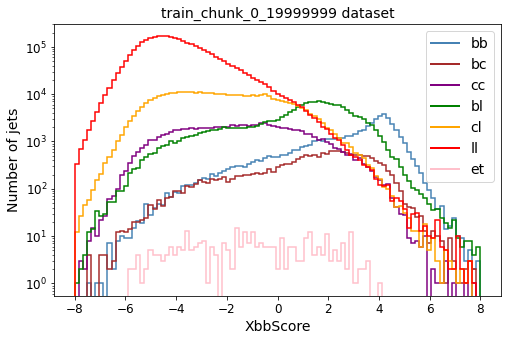

In [39]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(-8,8,100)

bins = plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"]== "bb"]["XbbScore"], bins = rang, histtype='step',  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label="bb")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bc"]["XbbScore"], bins[1], histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label="bc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] ==  "cc"]["XbbScore"], bins[1], histtype='step',  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label="cc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bl"]["XbbScore"], bins[1], histtype='step', color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label="bl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "cl"]["XbbScore"], bins[1], histtype='step', color='orange', lw=1.5)
plt.plot([], [], color='orange', linewidth=2, label="cl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "ll"]["XbbScore"], bins[1], histtype='step', color='red', lw=1.5)
plt.plot([], [], color='red', linewidth=2, label="ll")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "et"]["XbbScore"], bins[1], histtype='step', color='pink', lw=1.5)
plt.plot([], [], color='pink', linewidth=2, label="et")
# set the axis labels and title
plt.xlabel('XbbScore', fontsize=14)
plt.ylabel('Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)

Text(0.5, 1.0, 'train_chunk_0_19999999 dataset')

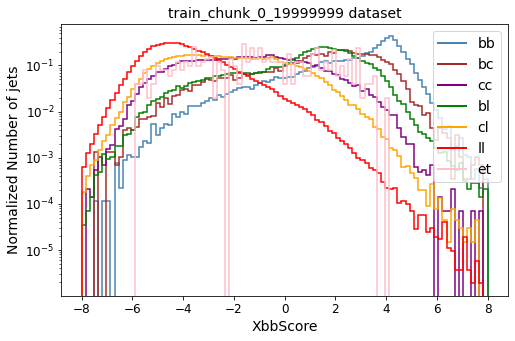

In [40]:
plt.figure(figsize = (8,5))

#Plotting the histograms
rang = np.linspace(-8,8,100)

bins = plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"]== "bb"]["XbbScore"], bins = rang, density = True,histtype='step',  color = 'steelblue', lw =1.5)
plt.plot([], [],color = 'steelblue',linewidth=2, label="bb")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bc"]["XbbScore"], bins[1], density = True ,histtype='step',  color='brown', lw=1.5)
plt.plot([], [], color='brown', linewidth=2, label="bc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] ==  "cc"]["XbbScore"], bins[1], density = True, histtype='step',  color='purple', lw=1.5)
plt.plot([], [], color='purple', linewidth=2, label="cc")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "bl"]["XbbScore"], bins[1], density = True, histtype='step', color='green', lw=1.5)
plt.plot([], [], color='green', linewidth=2, label="bl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "cl"]["XbbScore"], bins[1], density = True, histtype='step', color='orange', lw=1.5)
plt.plot([], [], color='orange', linewidth=2, label="cl")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "ll"]["XbbScore"], bins[1], density = True, histtype='step', color='red', lw=1.5)
plt.plot([], [], color='red', linewidth=2, label="ll")
plt.hist(df_JCR_QCD[df_JCR_QCD["QCD_category"] == "et"]["XbbScore"], bins[1], density = True, histtype='step', color='pink', lw=1.5)
plt.plot([], [], color='pink', linewidth=2, label="et")
# set the axis labels and title
plt.xlabel('XbbScore', fontsize=14)
plt.ylabel('Normalized Number of jets', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.yscale('log')
plt.legend(fontsize = 14)
plt.title('%s dataset'%sample_name, fontsize = 14)